# Execute this cell once to load libraries and trained model:

In [18]:
from fastai import *
from fastai.vision import *
from google.colab import drive
# Accessing My Google Drive
drive.mount('/content/drive')
from PIL import Image as PImage
from fastai.vision import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

from google.colab import files

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
classes = ['colon_aca', 'colon_n']
data2 = ImageDataBunch.single_from_classes('/content/drive/My Drive/Colab Notebooks/Histopathology_Cancer_Detection/data/lung_colon_image_set/colon_image_sets/colon', classes,  size=224).normalize(imagenet_stats)
learn = cnn_learner(data2, models.squeezenet1_1)
learn.load('/content/drive/My Drive/Colab Notebooks/Histopathology_Cancer_Detection/stage-2')
print('Libraries And Models Have Been Loaded')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Downloading: "https://download.pytorch.org/models/squeezenet1_1-f364aa15.pth" to /root/.cache/torch/checkpoints/squeezenet1_1-f364aa15.pth



Libraries And Models Have Been Loaded


# Run this cell to load and classify a histopathology sample

Saving colonn3.jpeg to colonn3.jpeg


Text(0.5, 1.0, 'This is most likely a healthy sample \n Run the cell again to try another image')

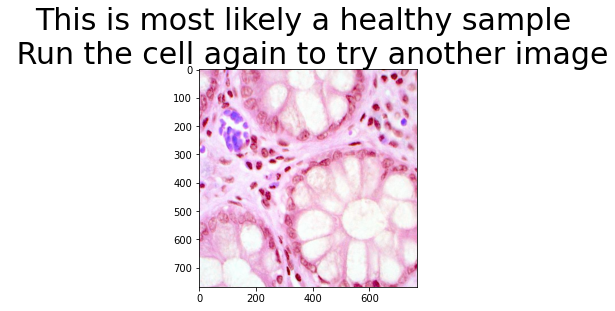

In [19]:
uploaded = files.upload()
file1 = list(uploaded.keys())[0]
img = open_image(file1)
img_show = cv2.imread(file1)        
pred_class,pred_idx,outputs = learn.predict(img) 
plt.imshow(img_show)
if learn.data.classes[np.argmax(outputs)]=='colon_aca':
  title = 'This sample is potentially malignant'
else:
  title = 'This is most likely a healthy sample \n Run the cell again to try another image'
plt.title(title, fontsize=30)               
#print(learn.data.classes[np.argmax(outputs)])  
